# DSS5101 Principles of Sustainability-CA2 Assignment


<h3><b>Assessing the Impact of Public Transportation Systems on Economic Disparity and Social Inclusivity in Urban Areas</b></h3>

<b>By:Lee Chang Hong (A0299003E), Jagan Nagappan s/o Muthaiah (A0081113X), Panchetty
Shreya(A0298875Y), Lau Tze Ann(A0075410R), Astraea Sim Xuan Wei (A0298201H)</b>

Importing required modules and data

In [4]:
#import the required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Read the CSV file into a pandas DataFrame
data = pd.read_csv('DSS5101-CA2TransportData.csv')

# Display the first 2 rows of the DataFrame to get a quick view of the data contents
data.head(2)

,Year,Gini Coefficient - JK,Gini Coefficient- SG,Life Expectancy - JK,Life Expectancy - SG,Population - JK,Population - SG,Ridership(MRT) - SG,Ridership(LRT) - SG,Ridership(Railway) - JK,Ridership(MRT) - JK
0,2013,0.4185,0.409,72.24,82.4,9951000,5399162,2623,132,433903,0
1,2014,0.4335,0.411,72.32,82.6,10061000,5469724,2762,137,570831,0


## Exploratory Data Analysis

In [7]:
# data types of each column 
data.dtypes

Year                         int64
Gini Coefficient - JK      float64
Gini Coefficient- SG       float64
Life Expectancy - JK       float64
Life Expectancy - SG       float64
Population - JK              int64
Population - SG              int64
Ridership(MRT) - SG          int64
Ridership(LRT) - SG          int64
Ridership(Railway) - JK      int64
Ridership(MRT) - JK          int64
dtype: object

In [8]:
# Check for missing values (NaN) 
data.isna()

,Year,Gini Coefficient - JK,Gini Coefficient- SG,Life Expectancy - JK,Life Expectancy - SG,Population - JK,Population - SG,Ridership(MRT) - SG,Ridership(LRT) - SG,Ridership(Railway) - JK,Ridership(MRT) - JK
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False


### Normalizing Life Expectancy Data for Jakarta and Singapore

In [10]:
# Normalize life expectancy data for Jakarta by dividing by 100
data['Life Expectancy_norm - JK'] = data['Life Expectancy - JK'] / 100

# Normalize life expectancy data for Singapore by dividing by 100
data['Life Expectancy_norm - SG'] = data['Life Expectancy - SG'] / 100

# Display the updated dataframe with the new normalized columns
data.head(2)

,Year,Gini Coefficient - JK,Gini Coefficient- SG,Life Expectancy - JK,Life Expectancy - SG,Population - JK,Population - SG,Ridership(MRT) - SG,Ridership(LRT) - SG,Ridership(Railway) - JK,Ridership(MRT) - JK,Life Expectancy_norm - JK,Life Expectancy_norm - SG
0,2013,0.4185,0.409,72.24,82.4,9951000,5399162,2623,132,433903,0,0.7224,0.824
1,2014,0.4335,0.411,72.32,82.6,10061000,5469724,2762,137,570831,0,0.7232,0.826


### Calculating Total Railway Ridership for Singapore and Jakarta

In [12]:
# Calculate total railway ridership in Singapore by summing MRT and LRT ridership
data['Ridership(Total Railway) - SG'] = data['Ridership(MRT) - SG'] + data['Ridership(LRT) - SG']

# Fill missing MRT ridership values in Jakarta with 0 
data['Ridership(MRT) - JK'].fillna(0, inplace=True)

# Calculate total railway ridership in Jakarta by summing railway and MRT ridership
data['Ridership(Total Railway) - JK'] = data['Ridership(Railway) - JK'] + data['Ridership(MRT) - JK']

# Display the updated dataframe with new ridership columns
data.head(2)

,Year,Gini Coefficient - JK,Gini Coefficient- SG,Life Expectancy - JK,Life Expectancy - SG,Population - JK,Population - SG,Ridership(MRT) - SG,Ridership(LRT) - SG,Ridership(Railway) - JK,Ridership(MRT) - JK,Life Expectancy_norm - JK,Life Expectancy_norm - SG,Ridership(Total Railway) - SG,Ridership(Total Railway) - JK
0,2013,0.4185,0.409,72.24,82.4,9951000,5399162,2623,132,433903,0,0.7224,0.824,2755,433903
1,2014,0.4335,0.411,72.32,82.6,10061000,5469724,2762,137,570831,0,0.7232,0.826,2899,570831


### Normalizing Ridership Data for Jakarta and Singapore

In [14]:
# Normalize total railway ridership in Singapore by scaling with population (per 1000 people)
data['Ridership(Total Railway)_norm - SG'] = (data['Ridership(Total Railway) - SG'] * 1000) / data['Population - SG']

# Normalize MRT ridership in Jakarta by scaling with population
data['Ridership(MRT)_norm - JK'] = data['Ridership(MRT) - JK'] / data['Population - JK']

# Normalize total railway ridership in Jakarta by scaling with population
data['Ridership(Total Railway)_norm - JK'] = data['Ridership(Total Railway) - JK'] / data['Population - JK']

# Display the updated dataframe with the new normalized columns
data.head(2)

,Year,Gini Coefficient - JK,Gini Coefficient- SG,Life Expectancy - JK,Life Expectancy - SG,Population - JK,Population - SG,Ridership(MRT) - SG,Ridership(LRT) - SG,Ridership(Railway) - JK,Ridership(MRT) - JK,Life Expectancy_norm - JK,Life Expectancy_norm - SG,Ridership(Total Railway) - SG,Ridership(Total Railway) - JK,Ridership(Total Railway)_norm - SG,Ridership(MRT)_norm - JK,Ridership(Total Railway)_norm - JK
0,2013,0.4185,0.409,72.24,82.4,9951000,5399162,2623,132,433903,0,0.7224,0.824,2755,433903,0.510264,0.0,0.043604
1,2014,0.4335,0.411,72.32,82.6,10061000,5469724,2762,137,570831,0,0.7232,0.826,2899,570831,0.530008,0.0,0.056737


### Summary Statistics for the data

In [16]:
#summary statistics for the data
columns_to_describe = ['Year','Gini Coefficient - JK','Gini Coefficient- SG','Life Expectancy_norm - JK','Life Expectancy_norm - SG','Ridership(MRT)_norm - JK','Ridership(Total Railway)_norm - SG','Ridership(Total Railway)_norm - JK']  

# Describe only the specified columns
data[columns_to_describe].describe()

,Year,Gini Coefficient - JK,Gini Coefficient- SG,Life Expectancy_norm - JK,Life Expectancy_norm - SG,Ridership(MRT)_norm - JK,Ridership(Total Railway)_norm - SG,Ridership(Total Railway)_norm - JK
count,11.000000,11.000000,11.000000,11.000000,11.00000,11.000000,11.000000,11.000000
mean,2018.000000,0.412318,0.394727,0.728023,0.83100,0.002357,0.536915,0.069430
std,3.316625,0.014478,0.014732,0.004495,0.00405,0.003348,0.079926,0.019173
min,2013.000000,0.392000,0.371000,0.722400,0.82400,0.000000,0.380245,0.033591
25%,2015.500000,0.401750,0.381500,0.725225,0.82950,0.000000,0.514932,0.057757
50%,2018.000000,0.411000,0.401000,0.727150,0.83000,0.000000,0.546161,0.074678
75%,2020.500000,0.422250,0.406000,0.730050,0.83300,0.003705,0.587100,0.082127
max,2023.000000,0.433500,0.411000,0.737450,0.83700,0.008426,0.629781,0.094904


### Descriptive Statistics of Gini Coefficient, Ridership, and Life Expectancy

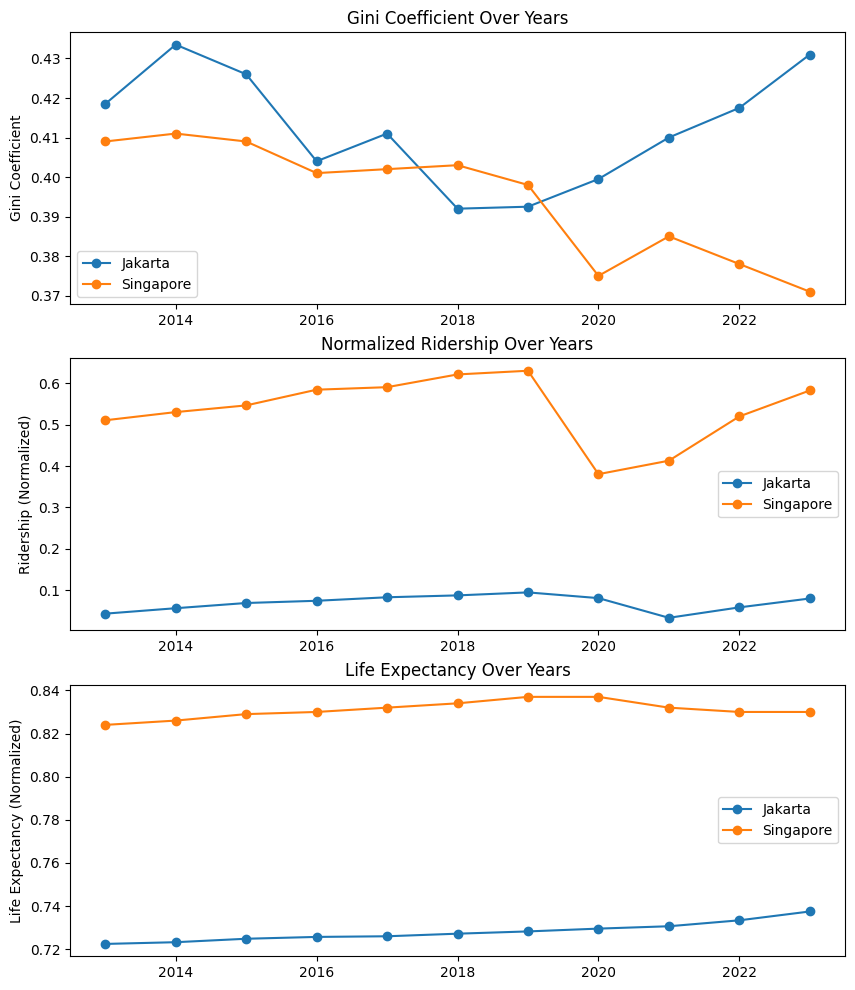

In [18]:
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

# Gini Coefficient Plot
axs[0].plot(data['Year'],data['Gini Coefficient - JK'],label='Jakarta', marker='o')
axs[0].plot(data['Year'],data['Gini Coefficient- SG'],label='Singapore', marker='o')
axs[0].set_title('Gini Coefficient Over Years')
axs[0].set_ylabel('Gini Coefficient')
axs[0].legend()

# Ridership Plot
axs[1].plot(data['Year'], data['Ridership(Total Railway)_norm - JK'], label='Jakarta', marker='o')
axs[1].plot(data['Year'], data['Ridership(Total Railway)_norm - SG'], label='Singapore', marker='o')
axs[1].set_title('Normalized Ridership Over Years')
axs[1].set_ylabel('Ridership (Normalized)')
axs[1].legend()

## Life Expectancy Plot
axs[2].plot(data['Year'], data['Life Expectancy_norm - JK'], label='Jakarta', marker='o')
axs[2].plot(data['Year'], data['Life Expectancy_norm - SG'], label='Singapore', marker='o')
axs[2].set_title('Life Expectancy Over Years')
axs[2].set_ylabel('Life Expectancy (Normalized)')
axs[2].legend()

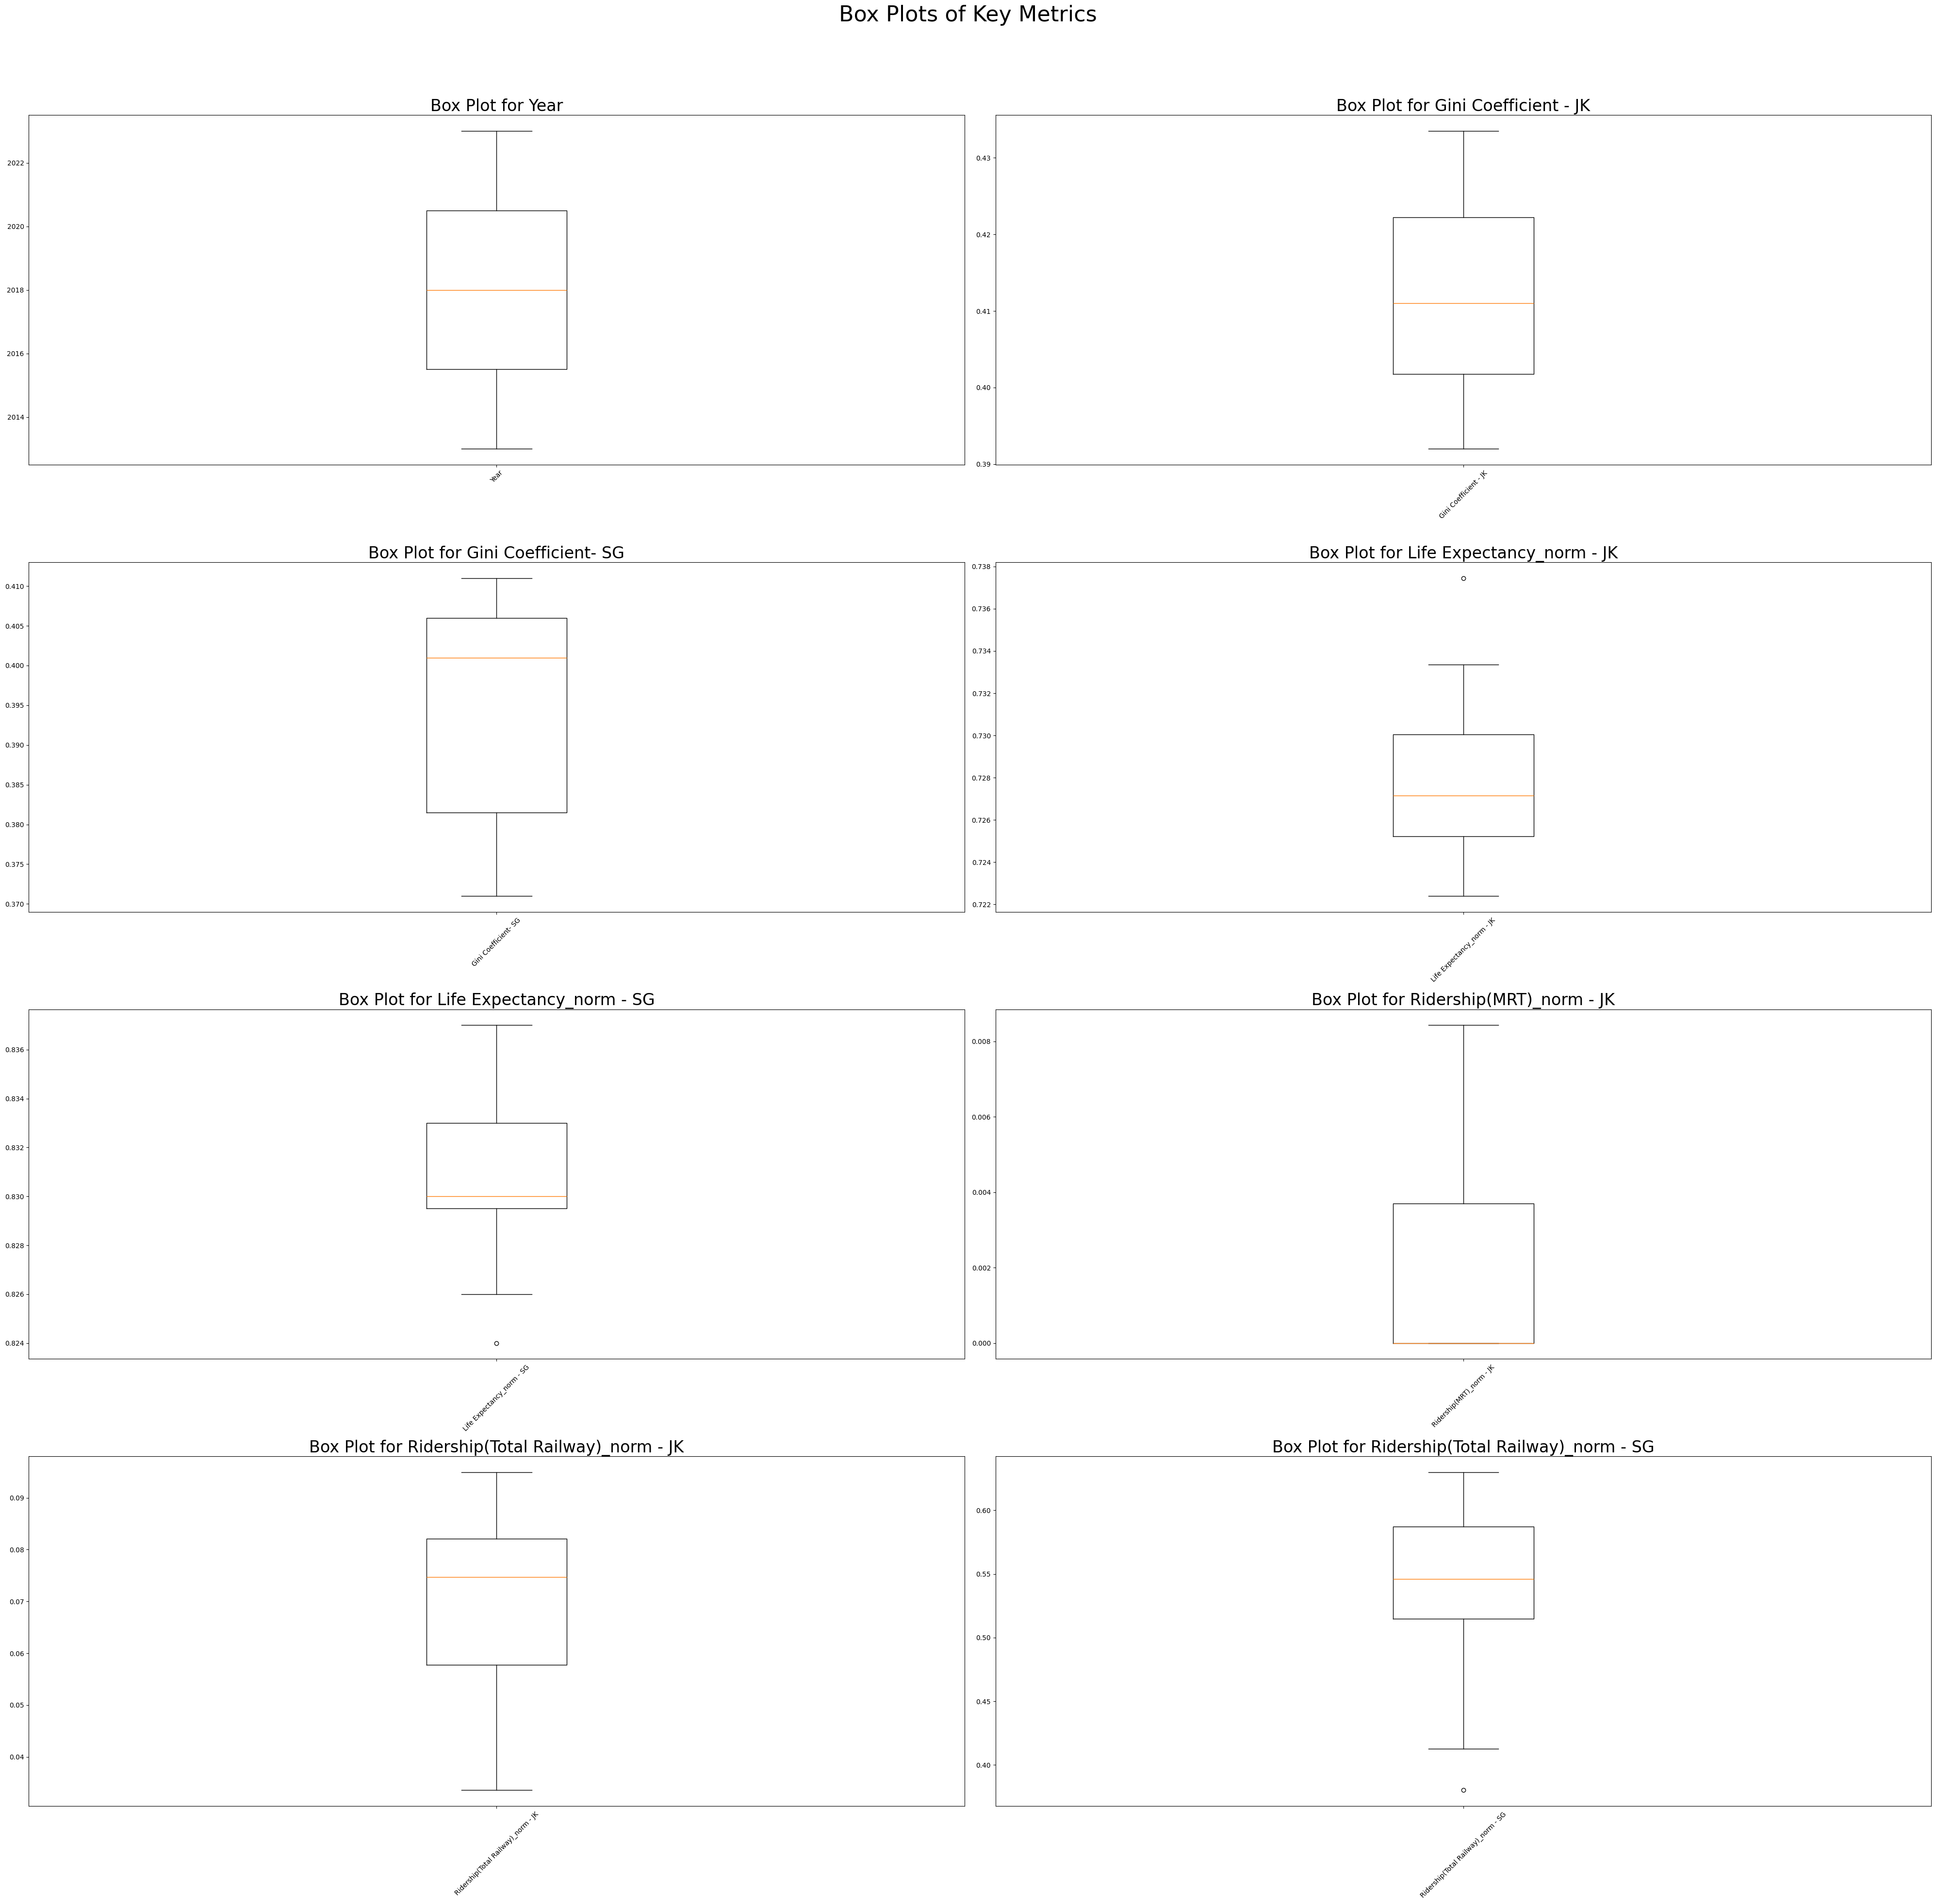

In [19]:
# Relevant columns for analysis
columns = [
    'Year',
    'Gini Coefficient - JK',
    'Gini Coefficient- SG',
    'Life Expectancy_norm - JK',
    'Life Expectancy_norm - SG',
    'Ridership(MRT)_norm - JK',
    'Ridership(Total Railway)_norm - JK',
    'Ridership(Total Railway)_norm - SG'
]

# Subset the data to include only the relevant columns
subset = data[columns]

# Set up the figure and axes for box plots (4 rows, 2 columns)
fig, axs = plt.subplots(4, 2, figsize=(40, 40))
fig.suptitle('Box Plots of Key Metrics', fontsize=32)

# Plotting each box plot in its respective subplot
for ax, col in zip(axs.flat, columns):
    ax.boxplot(subset[col])
    ax.set_title(f'Box Plot for {col}', fontsize=24)
    # Set x-tick labels for each plot
    ax.set_xticklabels([col], rotation=45)  # Set x-tick labels for each plot

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Jakarta MRT Charts

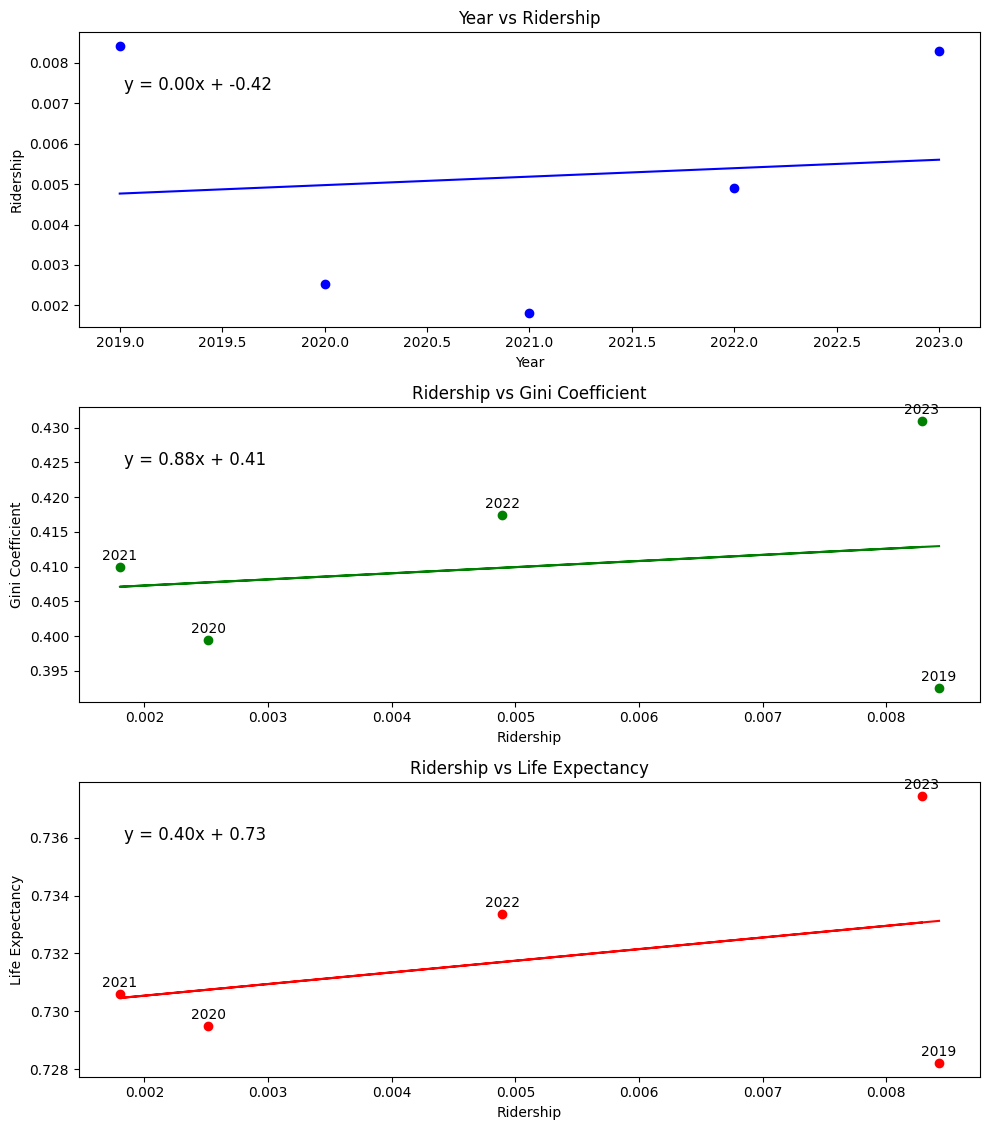

In [21]:
# Filter data for year >= 2019
year_filtered = data[data['Year'] >= 2019]

fig, axes = plt.subplots(3, 1, figsize=(10, 12))

# Plot 1: Year vs Normalized Bus Ridership (filtered for 2019 onwards)
axes[0].scatter(year_filtered['Year'], year_filtered['Ridership(MRT)_norm - JK'], color='b')
axes[0].set_title("Year vs Ridership")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Ridership")

# Add a trendline for Plot 1 (using filtered data)
m, b = np.polyfit(year_filtered['Year'], year_filtered['Ridership(MRT)_norm - JK'], 1)
axes[0].plot(year_filtered['Year'], m * year_filtered['Year'] + b, color='blue')
axes[0].text(0.05, 0.85, f'y = {m:.2f}x + {b:.2f}', transform=axes[0].transAxes, fontsize=12, verticalalignment='top')

# Plot 2: Ridership vs Gini Coefficient (filtered for 2019 onwards)
axes[1].scatter(year_filtered['Ridership(MRT)_norm - JK'], year_filtered['Gini Coefficient - JK'], color='g')
for i, txt in enumerate(year_filtered['Year']):
    axes[1].annotate(txt, (year_filtered['Ridership(MRT)_norm - JK'].iloc[i], year_filtered['Gini Coefficient - JK'].iloc[i]), 
                     textcoords="offset points", xytext=(0, 5), ha='center')
axes[1].set_title("Ridership vs Gini Coefficient")
axes[1].set_xlabel("Ridership")
axes[1].set_ylabel("Gini Coefficient")

# Add a trendline for Plot 2 (using filtered data)
m1, b1 = np.polyfit(year_filtered['Ridership(MRT)_norm - JK'], year_filtered['Gini Coefficient - JK'], 1)
axes[1].plot(year_filtered['Ridership(MRT)_norm - JK'], m1 * year_filtered['Ridership(MRT)_norm - JK'] + b1, color='green')
axes[1].text(0.05, 0.85, f'y = {m1:.2f}x + {b1:.2f}', transform=axes[1].transAxes, fontsize=12, verticalalignment='top')

# Plot 3: Ridership vs Life Expectancy (filtered for 2019 onwards)
axes[2].scatter(year_filtered['Ridership(MRT)_norm - JK'], year_filtered['Life Expectancy_norm - JK'], color='r')
for i, txt in enumerate(year_filtered['Year']):
    axes[2].annotate(txt, (year_filtered['Ridership(MRT)_norm - JK'].iloc[i], year_filtered['Life Expectancy_norm - JK'].iloc[i]), 
                     textcoords="offset points", xytext=(0, 5), ha='center')
axes[2].set_title("Ridership vs Life Expectancy")
axes[2].set_xlabel("Ridership")
axes[2].set_ylabel("Life Expectancy")

# Add a trendline for Plot 3 (using filtered data)
m2, b2 = np.polyfit(year_filtered['Ridership(MRT)_norm - JK'], year_filtered['Life Expectancy_norm - JK'], 1)
axes[2].plot(year_filtered['Ridership(MRT)_norm - JK'], m2 * year_filtered['Ridership(MRT)_norm - JK'] + b2, color='red')
axes[2].text(0.05, 0.85, f'y = {m2:.2f}x + {b2:.2f}', transform=axes[2].transAxes, fontsize=12, verticalalignment='top')

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the main title
plt.show()

## Comparing trend before and after COVID

### Year vs Ridership for Jakarta and Singapore 

In [24]:
# Filter data for the two time periods and reset the index
data_2013_2019 = data[(data['Year'] >= 2013) & (data['Year'] <= 2019)].reset_index(drop=True)
data_2020_2023 = data[(data['Year'] >= 2020) & (data['Year'] <= 2023)].reset_index(drop=True)

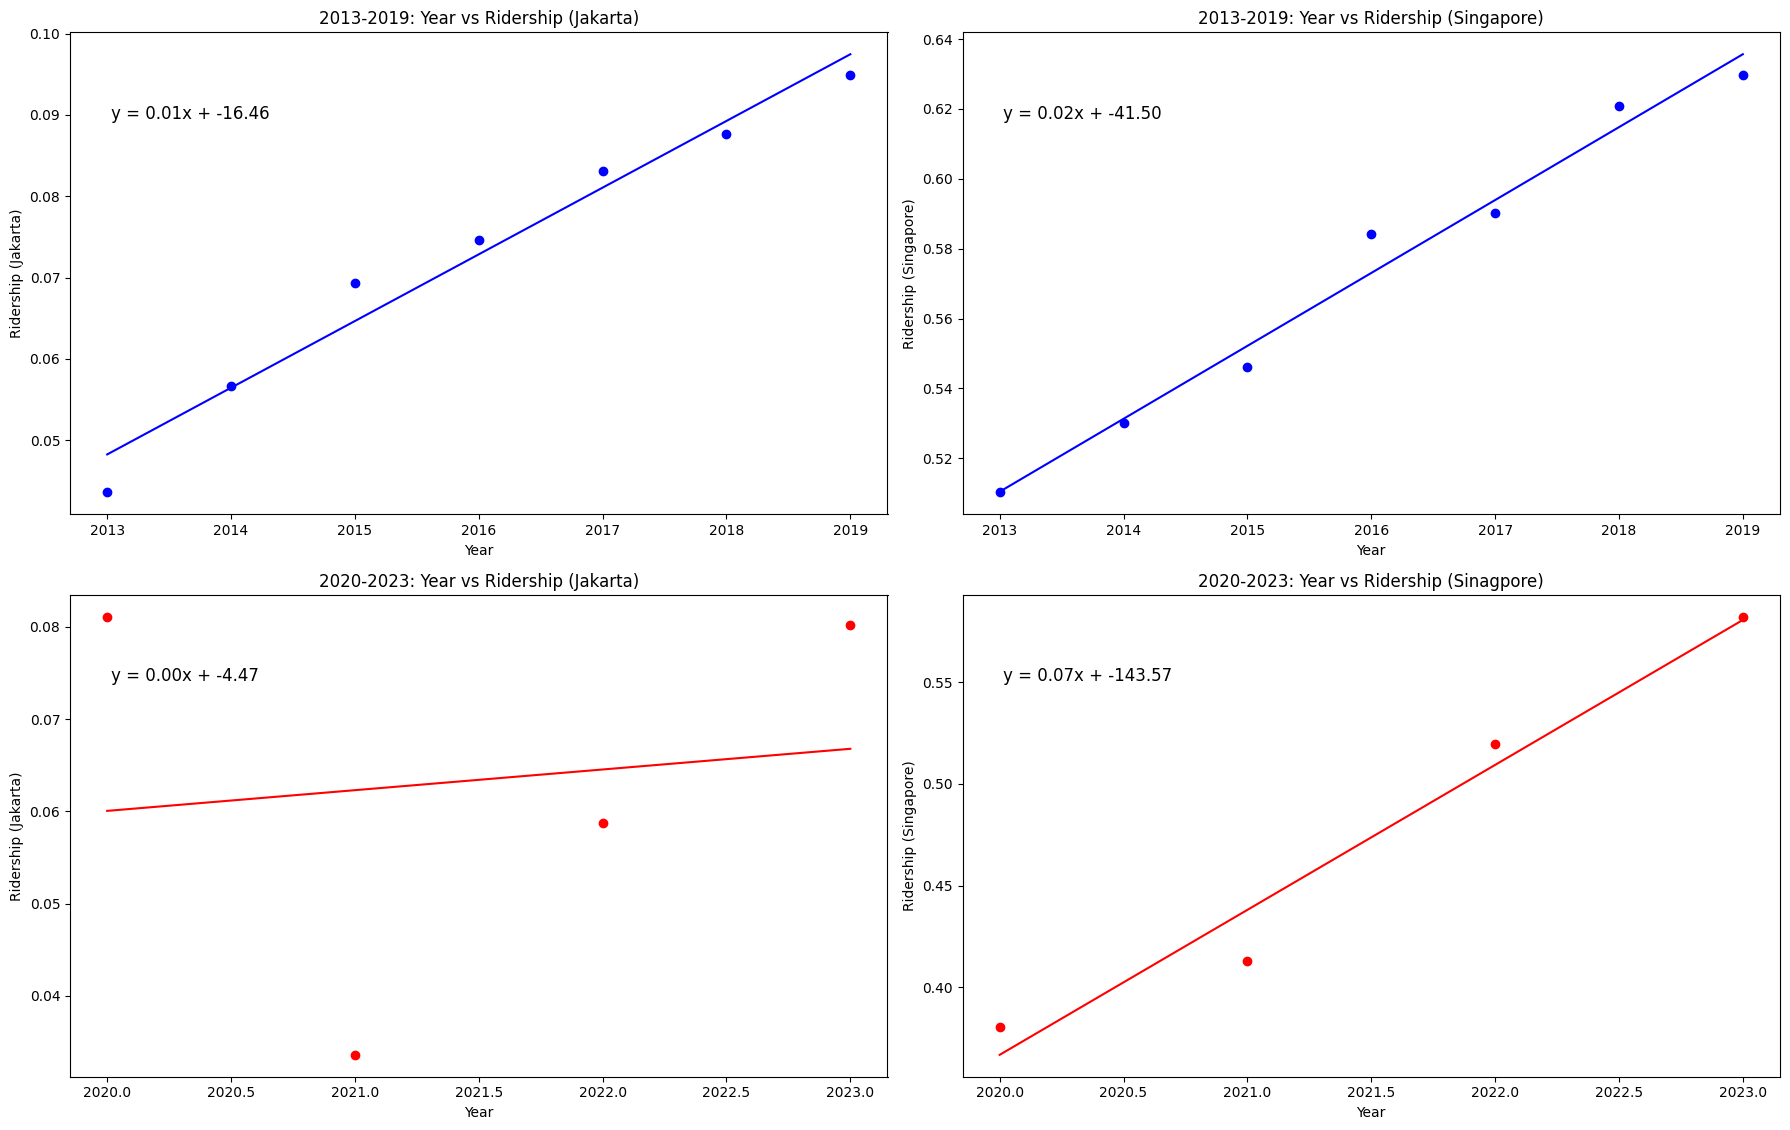

In [25]:
# Create subplots: 2 rows, 3 columns
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# --- 2013-2019 Period ---
# Plot 1: Year vs Ridership (2013-2019) for JK
axes[0, 0].scatter(data_2013_2019['Year'], data_2013_2019['Ridership(Total Railway)_norm - JK'], color='b')
axes[0, 0].set_title("2013-2019: Year vs Ridership (Jakarta)")
axes[0, 0].set_xlabel("Year")
axes[0, 0].set_ylabel("Ridership (Jakarta)")

# Add trendline for Plot 1 (JK)
m, b = np.polyfit(data_2013_2019['Year'], data_2013_2019['Ridership(Total Railway)_norm - JK'], 1)
axes[0, 0].plot(data_2013_2019['Year'], m * data_2013_2019['Year'] + b, color='blue')
axes[0, 0].text(0.05, 0.85, f'y = {m:.2f}x + {b:.2f}', transform=axes[0, 0].transAxes, fontsize=12, verticalalignment='top')

# Plot 2: Year vs Ridership (2013-2019) for SG
axes[0, 1].scatter(data_2013_2019['Year'], data_2013_2019['Ridership(Total Railway)_norm - SG'], color='blue')
axes[0, 1].set_title("2013-2019: Year vs Ridership (Singapore)")
axes[0, 1].set_xlabel("Year")
axes[0, 1].set_ylabel("Ridership (Singapore)")

# Add trendline for Plot 2 (SG)
m, b = np.polyfit(data_2013_2019['Year'], data_2013_2019['Ridership(Total Railway)_norm - SG'], 1)
axes[0, 1].plot(data_2013_2019['Year'], m * data_2013_2019['Year'] + b, color='blue')
axes[0, 1].text(0.05, 0.85, f'y = {m:.2f}x + {b:.2f}', transform=axes[0, 1].transAxes, fontsize=12, verticalalignment='top')

# --- 2020-2023 Period ---

# Plot 3: Year vs Ridership (2020-2023) for JK
axes[1, 0].scatter(data_2020_2023['Year'], data_2020_2023['Ridership(Total Railway)_norm - JK'], color='red')
axes[1, 0].set_title("2020-2023: Year vs Ridership (Jakarta)")
axes[1, 0].set_xlabel("Year")
axes[1, 0].set_ylabel("Ridership (Jakarta)")

# Add trendline for Plot 3 (JK)
m, b = np.polyfit(data_2020_2023['Year'], data_2020_2023['Ridership(Total Railway)_norm - JK'], 1)
axes[1, 0].plot(data_2020_2023['Year'], m * data_2020_2023['Year'] + b, color='red')
axes[1, 0].text(0.05, 0.85, f'y = {m:.2f}x + {b:.2f}', transform=axes[1, 0].transAxes, fontsize=12, verticalalignment='top')

# Plot 4: Year vs Ridership (2020-2023) for SG
axes[1, 1].scatter(data_2020_2023['Year'], data_2020_2023['Ridership(Total Railway)_norm - SG'], color='red')
axes[1, 1].set_title("2020-2023: Year vs Ridership (Sinagpore)")
axes[1, 1].set_xlabel("Year")
axes[1, 1].set_ylabel("Ridership (Singapore)")

# Add trendline for Plot 4 (SG)
m, b = np.polyfit(data_2020_2023['Year'], data_2020_2023['Ridership(Total Railway)_norm - SG'], 1)
axes[1, 1].plot(data_2020_2023['Year'], m * data_2020_2023['Year'] + b, color='red')
axes[1, 1].text(0.05, 0.85, f'y = {m:.2f}x + {b:.2f}', transform=axes[1, 1].transAxes, fontsize=12, verticalalignment='top')

# Add main title and adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Ridership vs Gini Coefficient for Jakarta and Singapore

Text(0.05, 0.85, 'y = -0.03x + 0.39')

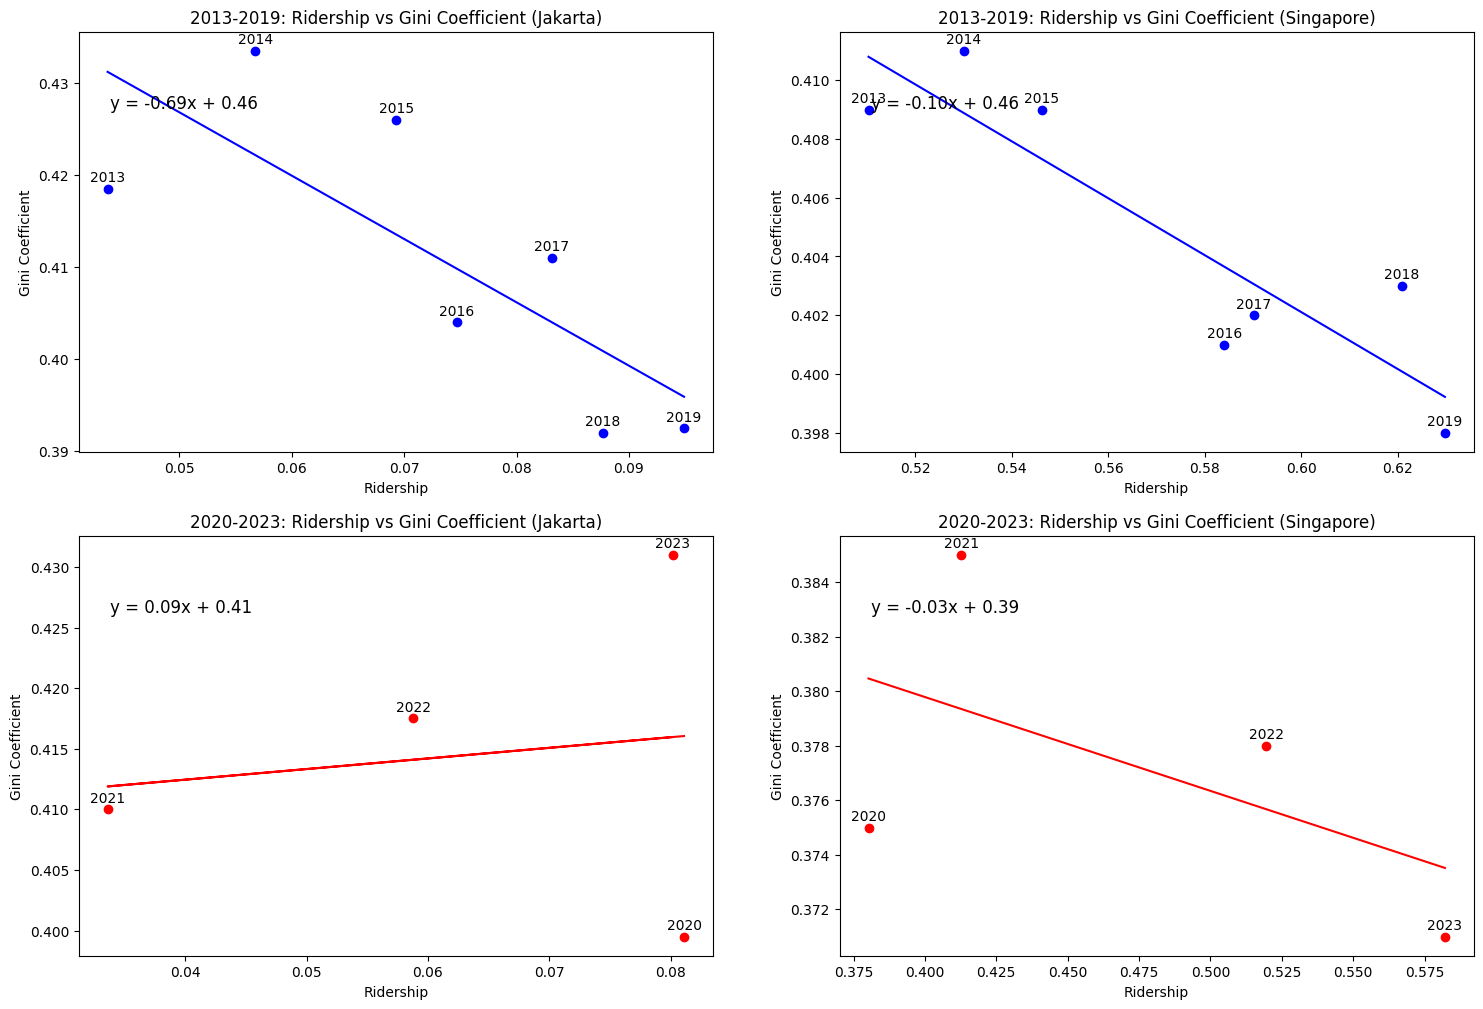

In [27]:
# Create subplots: 2 rows, 3 columns
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
# --- 2013-2019 Period ---
# Plot 1: Ridership vs Gini Coefficient (2013-2019) for Jakarta
axes[0, 0].scatter(data_2013_2019['Ridership(Total Railway)_norm - JK'], data_2013_2019['Gini Coefficient - JK'], color='b')
for i, txt in enumerate(data_2013_2019['Year']):
    axes[0,0].annotate(txt, (data_2013_2019['Ridership(Total Railway)_norm - JK'][i], data_2013_2019['Gini Coefficient - JK'][i]), 
                       textcoords="offset points", xytext=(0, 5), ha='center')
axes[0, 0].set_title("2013-2019: Ridership vs Gini Coefficient (Jakarta)")
axes[0, 0].set_xlabel("Ridership")
axes[0, 0].set_ylabel("Gini Coefficient")

# Add trendline for Plot 1 (JK)
m, b = np.polyfit(data_2013_2019['Ridership(Total Railway)_norm - JK'], data_2013_2019['Gini Coefficient - JK'], 1)
axes[0, 0].plot(data_2013_2019['Ridership(Total Railway)_norm - JK'], m * data_2013_2019['Ridership(Total Railway)_norm - JK'] + b, 
                color='blue')
axes[0, 0].text(0.05, 0.85, f'y = {m:.2f}x + {b:.2f}', transform=axes[0, 0].transAxes, fontsize=12, verticalalignment='top')

# Plot 2: Ridership vs Gini Coefficient (2013-2019) for Singapore
axes[0, 1].scatter(data_2013_2019['Ridership(Total Railway)_norm - SG'], data_2013_2019['Gini Coefficient- SG'], color='b')
for i, txt in enumerate(data_2013_2019['Year']):
    axes[0,1].annotate(txt, (data_2013_2019['Ridership(Total Railway)_norm - SG'][i], data_2013_2019['Gini Coefficient- SG'][i]), 
                       textcoords="offset points", xytext=(0, 5), ha='center')
axes[0, 1].set_title("2013-2019: Ridership vs Gini Coefficient (Singapore)")
axes[0, 1].set_xlabel("Ridership")
axes[0, 1].set_ylabel("Gini Coefficient")

# Add trendline for Plot 2 (Singapore)
m1, b1 = np.polyfit(data_2013_2019['Ridership(Total Railway)_norm - SG'], data_2013_2019['Gini Coefficient- SG'], 1)
axes[0, 1].plot(data_2013_2019['Ridership(Total Railway)_norm - SG'], m1 * data_2013_2019['Ridership(Total Railway)_norm - SG'] + b1, 
                color='b')
axes[0, 1].text(0.05, 0.85, f'y = {m1:.2f}x + {b1:.2f}', transform=axes[0, 1].transAxes, fontsize=12, verticalalignment='top')

# Plot 3: Ridership vs Gini Coefficient (2020-2023) for Jakarta
axes[1, 0].scatter(data_2020_2023['Ridership(Total Railway)_norm - JK'], data_2020_2023['Gini Coefficient - JK'], color='r')
for i, txt in enumerate(data_2020_2023['Year']):
    axes[1, 0].annotate(txt, (data_2020_2023['Ridership(Total Railway)_norm - JK'][i], data_2020_2023['Gini Coefficient - JK'][i]), 
                        textcoords="offset points", xytext=(0, 5), ha='center')
axes[1, 0].set_title("2020-2023: Ridership vs Gini Coefficient (Jakarta)")
axes[1, 0].set_xlabel("Ridership")
axes[1, 0].set_ylabel("Gini Coefficient")

# Add a trendline for Plot 3
m2, b2 = np.polyfit(data_2020_2023['Ridership(Total Railway)_norm - JK'], data_2020_2023['Gini Coefficient - JK'], 1)
axes[1, 0].plot(data_2020_2023['Ridership(Total Railway)_norm - JK'], m2 * data_2020_2023['Ridership(Total Railway)_norm - JK'] + b2, 
                color='r')
axes[1, 0].text(0.05, 0.85, f'y = {m2:.2f}x + {b2:.2f}', transform=axes[1, 0].transAxes, fontsize=12, verticalalignment='top')

# Plot 4: Ridership vs Gini Coefficient (2020-2023) for Singapore
axes[1, 1].scatter(data_2020_2023['Ridership(Total Railway)_norm - SG'], data_2020_2023['Gini Coefficient- SG'], color='r')
for i, txt in enumerate(data_2020_2023['Year']):
    axes[1, 1].annotate(txt, (data_2020_2023['Ridership(Total Railway)_norm - SG'][i], data_2020_2023['Gini Coefficient- SG'][i]), 
                        textcoords="offset points", xytext=(0, 5), ha='center')
axes[1, 1].set_title("2020-2023: Ridership vs Gini Coefficient (Singapore)")
axes[1, 1].set_xlabel("Ridership")
axes[1, 1].set_ylabel("Gini Coefficient")

# Add a trendline for Plot 4
m3, b3 = np.polyfit(data_2020_2023['Ridership(Total Railway)_norm - SG'], data_2020_2023['Gini Coefficient- SG'], 1)
axes[1, 1].plot(data_2020_2023['Ridership(Total Railway)_norm - SG'], m3 * data_2020_2023['Ridership(Total Railway)_norm - SG'] + b3, 
                color='r')
axes[1, 1].text(0.05, 0.85, f'y = {m3:.2f}x + {b3:.2f}', transform=axes[1, 1].transAxes, fontsize=12, verticalalignment='top')

### Ridership vs Life Expectancy for Jakarta and Singapore

Text(0.05, 0.85, 'y = -0.03x + 0.85')

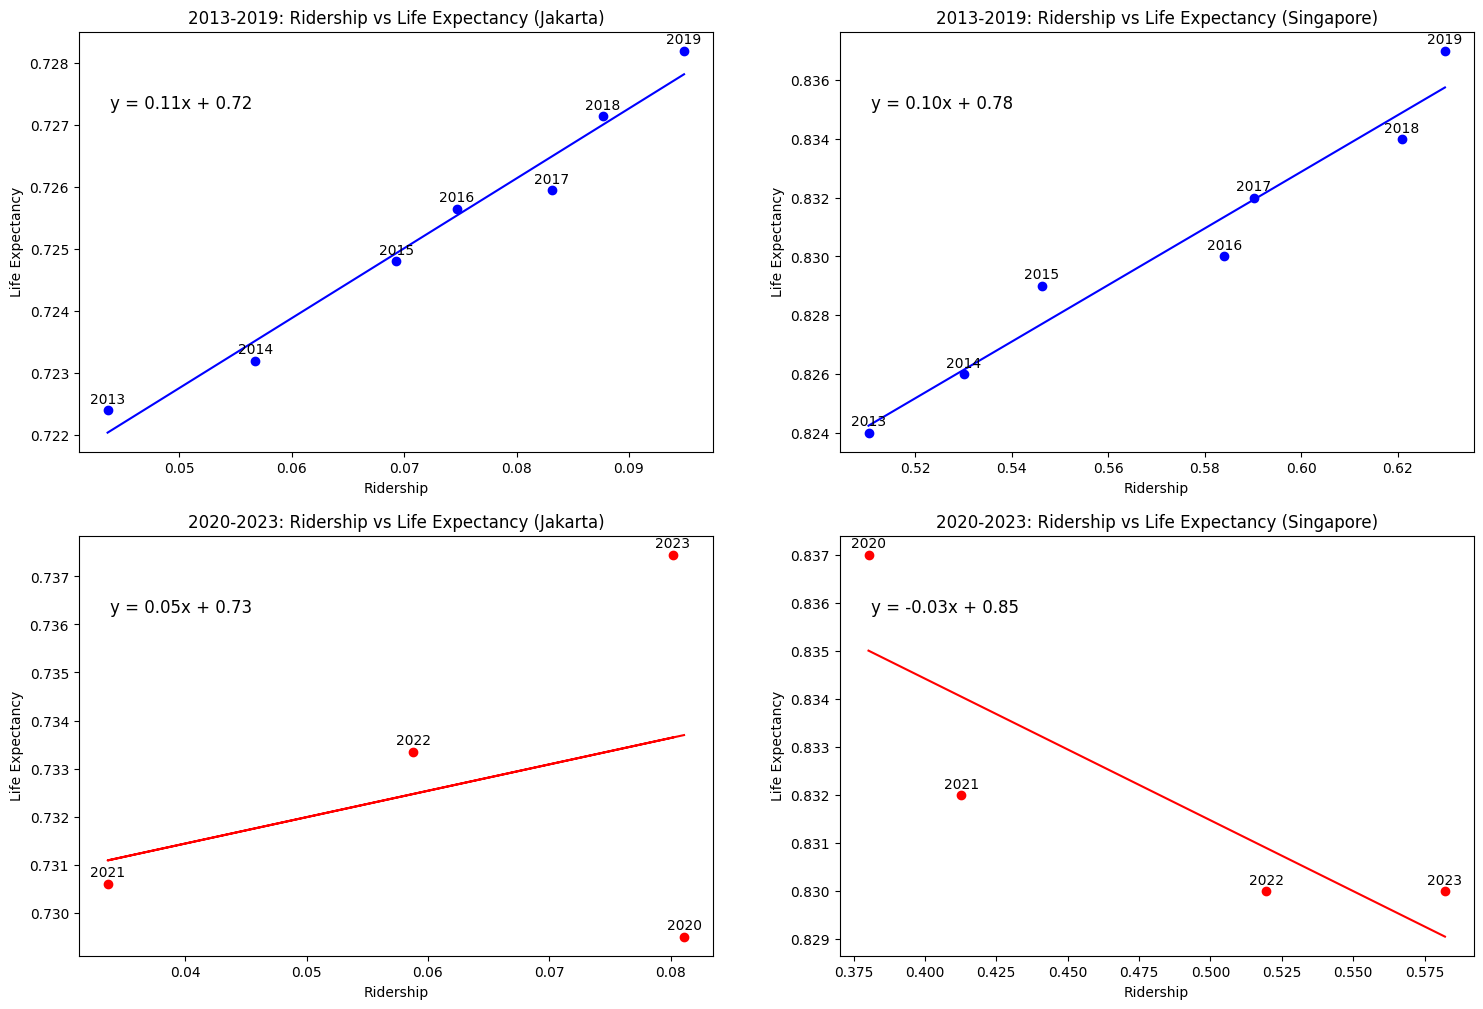

In [29]:
# Create subplots: 2 rows, 3 columns
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# --- 2013-2019 Period ---
# Plot 1: Ridership vs Life Expectancy (2013-2019) for Jakarta
axes[0, 0].scatter(data_2013_2019['Ridership(Total Railway)_norm - JK'], data_2013_2019['Life Expectancy_norm - JK'], color='b')
for i, txt in enumerate(data_2013_2019['Year']):
    axes[0,0].annotate(txt, (data_2013_2019['Ridership(Total Railway)_norm - JK'][i], data_2013_2019['Life Expectancy_norm - JK'][i]), 
                       textcoords="offset points", xytext=(0, 5), ha='center')
axes[0, 0].set_title("2013-2019: Ridership vs Life Expectancy (Jakarta)")
axes[0, 0].set_xlabel("Ridership")
axes[0, 0].set_ylabel("Life Expectancy")
# Add trendline for Plot 1 (JK)
m, b = np.polyfit(data_2013_2019['Ridership(Total Railway)_norm - JK'], data_2013_2019['Life Expectancy_norm - JK'], 1)

axes[0, 0].plot(data_2013_2019['Ridership(Total Railway)_norm - JK'], m * data_2013_2019['Ridership(Total Railway)_norm - JK'] + b, 
                color='blue')
axes[0, 0].text(0.05, 0.85, f'y = {m:.2f}x + {b:.2f}', transform=axes[0, 0].transAxes, fontsize=12, verticalalignment='top')

# Plot 2: Ridership vs Life Expectancy (2013-2019) for Singapore
axes[0, 1].scatter(data_2013_2019['Ridership(Total Railway)_norm - SG'], data_2013_2019['Life Expectancy_norm - SG'], color='b')
for i, txt in enumerate(data_2013_2019['Year']):
    axes[0,1].annotate(txt, (data_2013_2019['Ridership(Total Railway)_norm - SG'][i], data_2013_2019['Life Expectancy_norm - SG'][i]), 
                       textcoords="offset points", xytext=(0, 5), ha='center')
axes[0, 1].set_title("2013-2019: Ridership vs Life Expectancy (Singapore)")
axes[0, 1].set_xlabel("Ridership")
axes[0, 1].set_ylabel("Life Expectancy")
# Add trendline for Plot 2 (Singapore)
m1, b1 = np.polyfit(data_2013_2019['Ridership(Total Railway)_norm - SG'], data_2013_2019['Life Expectancy_norm - SG'], 1)
axes[0, 1].plot(data_2013_2019['Ridership(Total Railway)_norm - SG'], m1 * data_2013_2019['Ridership(Total Railway)_norm - SG'] + b1, 
                color='b')
axes[0, 1].text(0.05, 0.85, f'y = {m1:.2f}x + {b1:.2f}', transform=axes[0, 1].transAxes, fontsize=12, verticalalignment='top')

# Plot 3: Ridership vs Life Expectancy (2020-2023) for Jakarta
axes[1, 0].scatter(data_2020_2023['Ridership(Total Railway)_norm - JK'], data_2020_2023['Life Expectancy_norm - JK'], color='r')
for i, txt in enumerate(data_2020_2023['Year']):
    axes[1, 0].annotate(txt, (data_2020_2023['Ridership(Total Railway)_norm - JK'][i], data_2020_2023['Life Expectancy_norm - JK'][i]), 
                        textcoords="offset points", xytext=(0, 5), ha='center')
axes[1, 0].set_title("2020-2023: Ridership vs Life Expectancy (Jakarta)")
axes[1, 0].set_xlabel("Ridership")
axes[1, 0].set_ylabel("Life Expectancy")
# Add a trendline for Plot 3
m2, b2 = np.polyfit(data_2020_2023['Ridership(Total Railway)_norm - JK'], data_2020_2023['Life Expectancy_norm - JK'], 1)
axes[1, 0].plot(data_2020_2023['Ridership(Total Railway)_norm - JK'], m2 * data_2020_2023['Ridership(Total Railway)_norm - JK'] + b2, 
                color='r')
axes[1, 0].text(0.05, 0.85, f'y = {m2:.2f}x + {b2:.2f}', transform=axes[1, 0].transAxes, fontsize=12, verticalalignment='top')

# Plot 4: Ridership vs Life Expectancy (2020-2023) for Singapore
axes[1, 1].scatter(data_2020_2023['Ridership(Total Railway)_norm - SG'], data_2020_2023['Life Expectancy_norm - SG'], color='r')
for i, txt in enumerate(data_2020_2023['Year']):
    axes[1, 1].annotate(txt, (data_2020_2023['Ridership(Total Railway)_norm - SG'][i], data_2020_2023['Life Expectancy_norm - SG'][i]), 
                        textcoords="offset points", xytext=(0, 5), ha='center')
axes[1, 1].set_title("2020-2023: Ridership vs Life Expectancy (Singapore)")
axes[1, 1].set_xlabel("Ridership")
axes[1, 1].set_ylabel("Life Expectancy")
# Add a trendline for Plot 4
m3, b3 = np.polyfit(data_2020_2023['Ridership(Total Railway)_norm - SG'], data_2020_2023['Life Expectancy_norm - SG'], 1)
axes[1, 1].plot(data_2020_2023['Ridership(Total Railway)_norm - SG'], m3 * data_2020_2023['Ridership(Total Railway)_norm - SG'] + b3, 
                color='r')
axes[1, 1].text(0.05, 0.85, f'y = {m3:.2f}x + {b3:.2f}', transform=axes[1, 1].transAxes, fontsize=12, verticalalignment='top')

### Lorenz curve for ridership vs Gini coefficient 

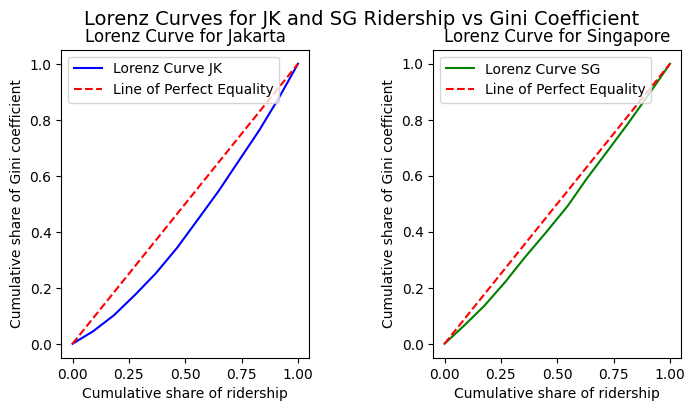

In [31]:
# Sort data by 'Ridership(Total Railway)_norm - JK' and calculate cumulative shares for JK
data_sorted_jk = data.sort_values(by='Ridership(Total Railway)_norm - JK')
cumulative_ridership_jk = np.cumsum(data_sorted_jk['Ridership(Total Railway)_norm - JK']) / data_sorted_jk['Ridership(Total Railway)_norm - JK'].sum()
cumulative_gini_jk = np.cumsum(data_sorted_jk['Gini Coefficient - JK']) / data_sorted_jk['Gini Coefficient - JK'].sum()

# Add (0,0) as starting point for Lorenz curve JK
cumulative_ridership_jk = np.insert(cumulative_ridership_jk, 0, 0)
cumulative_gini_jk = np.insert(cumulative_gini_jk, 0, 0)

# Sort data by 'Ridership(MRT)_norm - SG' and calculate cumulative shares for SG
data_sorted_sg = data.sort_values(by='Ridership(Total Railway)_norm - SG')
cumulative_ridership_sg = np.cumsum(data_sorted_sg['Ridership(Total Railway)_norm - SG']) / data_sorted_sg['Ridership(Total Railway)_norm - SG'].sum()
cumulative_gini_sg = np.cumsum(data_sorted_sg['Gini Coefficient- SG']) / data_sorted_sg['Gini Coefficient- SG'].sum()

# Add (0,0) as starting point for Lorenz curve SG
cumulative_ridership_sg = np.insert(cumulative_ridership_sg, 0, 0)
cumulative_gini_sg = np.insert(cumulative_gini_sg, 0, 0)

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Plot Lorenz curve for JK on the first subplot
axes[0].plot( cumulative_gini_jk,cumulative_ridership_jk, label="Lorenz Curve JK", color="blue")
axes[0].plot([0, 1], [0, 1], color='red', linestyle='--', label="Line of Perfect Equality")
axes[0].set_title("Lorenz Curve for Jakarta")
axes[0].set_xlabel("Cumulative share of ridership")
axes[0].set_ylabel("Cumulative share of Gini coefficient")
axes[0].legend()

# Plot Lorenz curve for SG on the second subplot
axes[1].plot(cumulative_gini_sg, cumulative_ridership_sg, label="Lorenz Curve SG", color="green")
axes[1].plot([0, 1], [0, 1], color='red', linestyle='--', label="Line of Perfect Equality")
axes[1].set_title("Lorenz Curve for Singapore")
axes[1].set_xlabel("Cumulative share of ridership")
axes[1].set_ylabel("Cumulative share of Gini coefficient")
axes[1].legend()


# Add a header for both plots
fig.suptitle("Lorenz Curves for JK and SG Ridership vs Gini Coefficient", fontsize=14)
# Adjust layout for better visibility and add space between plots
plt.subplots_adjust(wspace=0.5)
plt.show()

The Lorenz curve illustrates the cumulative distribution of the Gini coefficient, in relation to the cumulative proportion of ridership, so demonstrating the equality or inequality of resource distribution. The "Line of Perfect Equality" represents the diagonal line indicating total equality, where each individual possesses an identical share of riding.


<b>Lorenz Curve for Jakarta (Left Graph):</b>

The curve is more distant from the line of perfect equality, signifying an elevated degree of inequality in the ridership distribution. This indicates that Jakarta's Gini coefficient is comparatively elevated, demonstrating that a minor segment of the population accounts for or benefits from a disproportionate percentage of passengers.


<b>Lorenz Curve for Singapore (Right Graph):</b>

The curve approaches the line of perfect equality, indicating a more equitable distribution of ridership. This signifies a reduced Gini coefficient, indicating that ridership is more uniformly distributed throughout the population in Singapore relative to Jakarta.

<b>Relationship Interpretation: </b>

The juxtaposition of these two Lorenz curves indicates that Jakarta exhibits a more unequal distribution of ridership, as evidenced by a higher Gini coefficient, whilst Singapore demonstrates a more equitable distribution, reflected by a lower Gini coefficient. The larger the divergence of the Lorenz curve from the line of perfect equality, the greater the inequality. Consequently, these graphs suggest that Singapore's public transport system is likely more uniformly accessible or utilised than that of Jakarta.

### Correlation Matrix

                                    Gini Coefficient - JK  \
Gini Coefficient - JK                            1.000000   
Ridership(Total Railway)_norm - JK              -0.464068   
Life Expectancy_norm - JK                        0.053005   

                                    Ridership(Total Railway)_norm - JK  \
Gini Coefficient - JK                                        -0.464068   
Ridership(Total Railway)_norm - JK                            1.000000   
Life Expectancy_norm - JK                                     0.144102   

                                    Life Expectancy_norm - JK  
Gini Coefficient - JK                                0.053005  
Ridership(Total Railway)_norm - JK                   0.144102  
Life Expectancy_norm - JK                            1.000000  
                                    Gini Coefficient- SG  \
Gini Coefficient- SG                            1.000000   
Ridership(Total Railway)_norm - SG              0.410653   
Life Expectancy_norm -

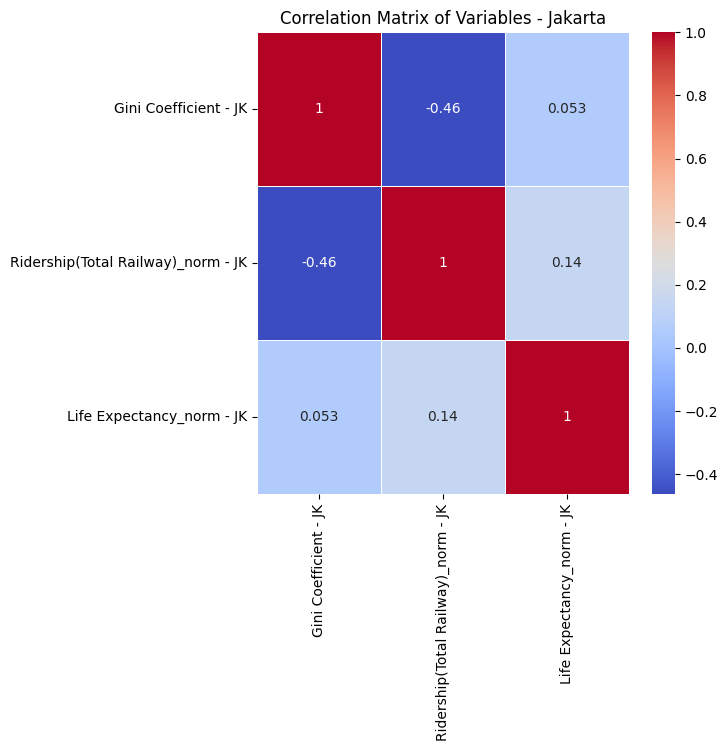

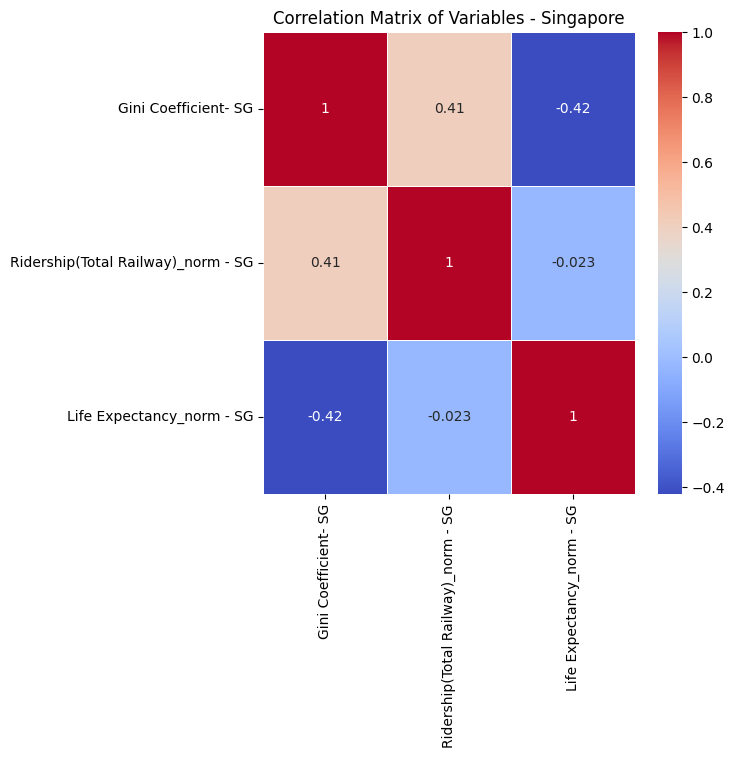

In [34]:
# Correlation Matrix
# Specify specific columns for Jakarta and Singapore first
columns_jakarta = ['Gini Coefficient - JK', 'Ridership(Total Railway)_norm - JK', 'Life Expectancy_norm - JK']
columns_singapore = ['Gini Coefficient- SG', 'Ridership(Total Railway)_norm - SG', 'Life Expectancy_norm - SG']

# Create data subset for Jakarta and Singapore
subset_jakarta = data[columns_jakarta]
subset_singapore = data[columns_singapore]

# Run correlation, print and plot.
correlation_matrix_jakarta = subset_jakarta.corr()
correlation_matrix_singapore = subset_singapore.corr()

print(correlation_matrix_jakarta)
print(correlation_matrix_singapore)

# Plot
plt.figure(figsize=(6,6))
sns.heatmap(correlation_matrix_jakarta, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Variables - Jakarta')
plt.show()

plt.figure(figsize=(6,6))
sns.heatmap(correlation_matrix_singapore, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Variables - Singapore')
plt.show()

<b>Understanding data</b>: 

<li>Gini Coefficient: Measures inequality. Ranges from 0 to 1, 0 means perfect equality, 1 means perfect inequality.</li>
<li>Ridership: Amount of passengers. Life Expectancy: Measure of average time someone is expected to live, based on their birth year, age and gender.</li>

<b>Understanding relationships between variables (Jakarta):</b>

<li>Ridership vs Life Expectancy: Correlation of 0.96. Very strong positive correlation. Based on the dataset, it is observed that as ridership increases, life expectancy also increases. This IMPLY (correlation is not equal to causation!!) that improvements in public transportation access and usage COULD be linked to better health outcomes.</li>

<li>Ridership vs Gini Coefficient: Correlation of -0.75. Moderately strong negative correlation. Based on the dataset, it is observed that as ridership increases, economic disparity decreases. This IMPLY that better accessibility to public transport COULD contribute to improved equitable economic conditions.</li>

<b>Understanding relationships between variables (Singapore):</b>

<li>Ridership vs Life Expectancy: Correlation of -0.13. Very weak correlation. This suggests that there is little to no relationship between ridership and life expectancy in Singapore.</li>

<li>Ridership vs Gini Coefficient: Correlation of 0.33. Weak positive correlation. This suggests that access to public transport have a small positive correlation with economic disparity. Even there is higher ridership, economic disparity does not substantially decrease in Singapore. (Internal note: Due to other socio-economic structures?)</li>

<b>Summary (Jakarta):</b>
- High public transport ridership seem to be strongly correlated to increase life expectancy and reduced economic disparity. 
- Perhaps due to it being a developing city.
- Higher railway ridership appears to be linked to lower income inequality.

<b>Summary (Singapore):</b>
- Correlation between ridership, life expectancy and economic disparity is much weaker.
- Increased ridership correlates with higher income inequality, 
- Could be because Singapore is already developed and achieved a high level of infra development and social equity.